# This notebook provides a comprehensive geospatial analysis of New York City boroughs. It includes visualizations of borough boundaries, restaurant locations, pedestrian counts, and more.

# Libraries and Data Loading

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.animation as animation
from folium.plugins import MarkerCluster
warnings.filterwarnings("ignore")

In [4]:
# Load the Boroughs Geojson
boroughs_gdf = gpd.read_file(r"D:\Text Analytics\MainRoot\Geospatial Project\data\new-york-city-boroughs.geojson")

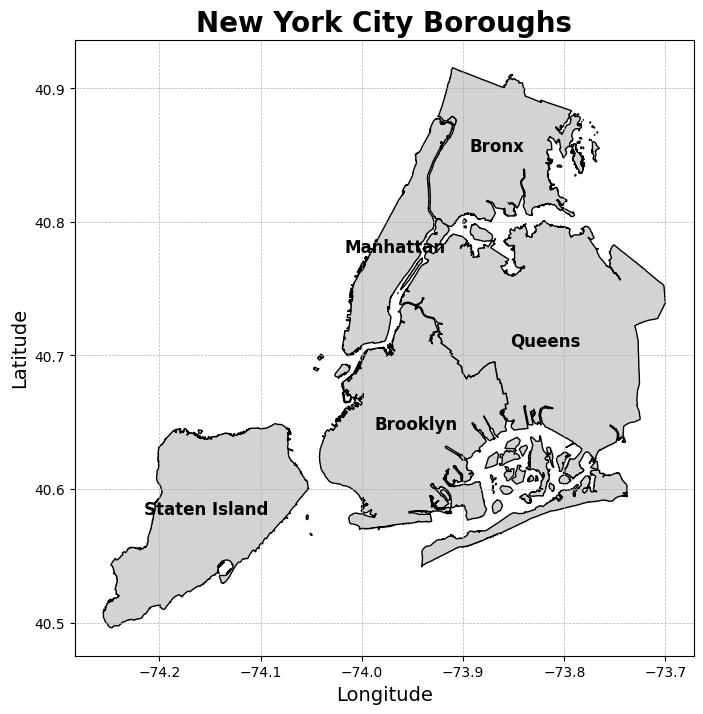

In [5]:
# Plot the data with enhancements
fig, ax = plt.subplots(figsize=(12, 8))
boroughs_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='lightgray')

# Adding annotations for each borough
for idx, row in boroughs_gdf.iterrows():
    plt.annotate(row['name'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=12, color='black', weight='bold')

# Customize the plot
plt.title("New York City Boroughs", fontsize=20, weight='bold')
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# # Highlighting a specific borough
# highlight_borough = boroughs_gdf[boroughs_gdf['name'] == 'Manhattan']
# highlight_borough.plot(ax=ax, color='yellow', edgecolor='black', linewidth=1, alpha=0.5)

# Show plot
plt.show()

In [6]:
boroughs_gdf.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Staten Island,1,2013-03-09 02:42:03.692000+00:00,2013-03-09 02:42:03.989000+00:00,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,Queens,2,2013-03-09 02:42:03.692000+00:00,2013-03-09 02:42:03.989000+00:00,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,Brooklyn,3,2013-03-09 02:42:03.692000+00:00,2013-03-09 02:42:03.989000+00:00,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,Manhattan,4,2013-03-09 02:42:03.692000+00:00,2013-03-09 02:42:03.989000+00:00,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,Bronx,5,2013-03-09 02:42:03.692000+00:00,2013-03-09 02:42:03.989000+00:00,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [7]:
# Load the Restaurant GeoJSON
restaurants_gdf = gpd.read_file(r"D:\Text Analytics\MainRoot\Geospatial Project\data\NewYorkRestaurant.geojson")

In [8]:
restaurants_gdf.head()

,id,@id,addr:city,addr:country,addr:flats,addr:floor,addr:full,addr:housename,addr:housenumber,addr:place,...,website:orders,website:reservation,wheelchair,wheelchair:description,wifi,wikidata,wikipedia,women_owned,year,geometry
0,node/296568074,node/296568074,None,None,None,None,None,None,None,None,...,None,None,None,None,None,Q7719863,None,None,None,POINT (-74.03035 40.73860)
1,node/305499273,node/305499273,Hoboken,None,None,None,None,None,61,None,...,None,None,None,None,None,None,None,None,None,POINT (-74.02858 40.74332)
2,node/357618253,node/357618253,Fresh Meadows,None,None,None,None,None,61-09,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.78430 40.74082)
3,node/357620442,node/357620442,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.97846 40.74156)
4,node/380044344,node/380044344,Brooklyn,None,None,None,None,None,73,None,...,None,None,no,None,None,None,None,None,None,POINT (-73.98657 40.70253)


In [9]:
# Load the Ped Count csv
ped_counts_df = pd.read_csv(r"D:\Text Analytics\MainRoot\Geospatial Project\data\PedCountLocationsMay2015.csv")

In [10]:
ped_counts_df.head()

,the_geom,OBJECTID,Loc,Borough,Street_Nam,From_Stree,To_Street,Iex,May07_AM,May07_PM,...,Oct22_MD,May23_AM,May23_pM,May23_MD,Oct23_AM,Oct23_PM,Oct23_MD,June24_AM,June24_PM,June24_MD
0,POINT (-73.90459140730678 40.87919896648574),1,1,Bronx,Broadway,West 231st Street,Naples Terrace,N,1189,4094,...,2241,1897,5018,2496,935,3759,1745,901,3482,2052
1,POINT (-73.92188432870218 40.82662794123292),2,2,Bronx,East 161st Street,Gra Concourse,Sheridan Avenue,Y,1511,3184,...,1867,2384,4600,2064,2822,5050,1287,2113,4155,1493
2,POINT (-73.89535781584335 40.86215460031517),3,3,Bronx,East Fordham Road,Valentine Avenue,Tiebout Avenue,Y,1832,12311,...,4765,1654,6918,4696,1560,6880,2453,1485,7125,3819
3,POINT (-73.87892467324478 40.8812869959873),4,4,Bronx,East Gun Hill Road,Bainbridge Avenue,Rochambeau Avenue,N,764,2673,...,1032,1398,2280,1303,1404,2089,807,1394,2023,1190
4,POINT (-73.88956389732787 40.844636776717664),5,5,Bronx,East Tremont Avenue,Prospect Avenue,Clinton Avenue,N,650,2538,...,1611,730,2077,1578,786,2140,1115,550,1455,1563


In [11]:
# Extract longitude and latitude from 'the_geom' column
ped_counts_df['longitude'] = ped_counts_df['the_geom'].apply(lambda x: float(x.split(' ')[1].strip('POINT()')))
ped_counts_df['latitude'] = ped_counts_df['the_geom'].apply(lambda x: float(x.split(' ')[2].strip('POINT()')))

In [12]:
# Convert pedestrian counts to GeoDataFrame
ped_counts_gdf = gpd.GeoDataFrame(
    ped_counts_df,
    geometry=gpd.points_from_xy(ped_counts_df.longitude, ped_counts_df.latitude),
    crs="EPSG:4326"
)

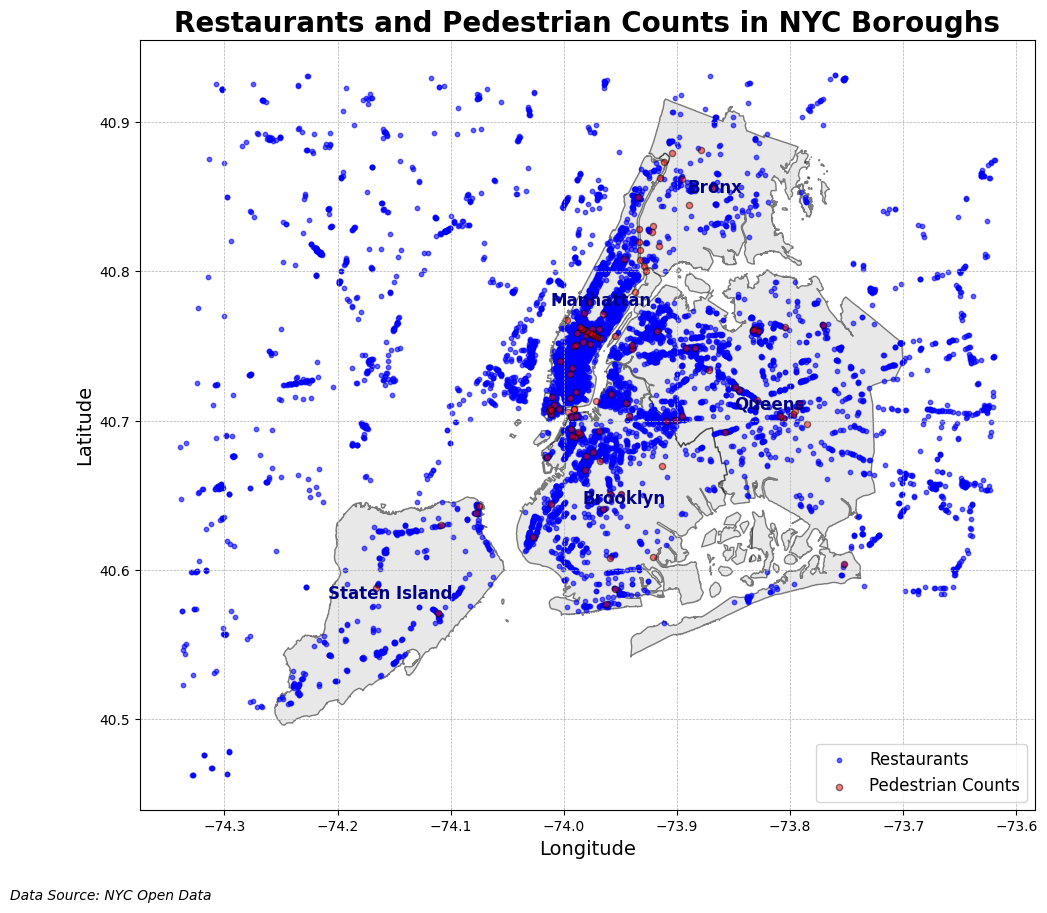

In [13]:
# Plot Data with Borough Boundaries
fig, ax = plt.subplots(figsize=(14, 10))
boroughs_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='lightgray', alpha=0.5)

# Adding annotations for each borough
for idx, row in boroughs_gdf.iterrows():
    plt.annotate(row['name'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=12, color='darkblue', weight='bold')

# Plot restaurants and pedestrian counts
restaurants_gdf.plot(ax=ax, color='blue', markersize=10, label='Restaurants', alpha=0.6)
ped_counts_gdf.plot(ax=ax, color='red', markersize=20, alpha=0.5, label='Pedestrian Counts', edgecolor='black')

# Customize the plot
plt.title("Restaurants and Pedestrian Counts in NYC Boroughs", fontsize=20, weight='bold')
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend and source annotation
plt.legend(fontsize=12)
plt.figtext(0.1, 0.02, 'Data Source: NYC Open Data', horizontalalignment='left', fontsize=10, style='italic')

# # Highlighting a specific borough (optional)
# highlight_borough = boroughs_gdf[boroughs_gdf['name'] == 'Manhattan']
# highlight_borough.plot(ax=ax, color='yellow', edgecolor='black', linewidth=1, alpha=0.5)

# # Adding a vertical line for a specific longitude (optional)
# plt.axvline(x=highlight_borough.geometry.centroid.x.mean(), color='red', linestyle='--', linewidth=1)

# Show plot
plt.show()

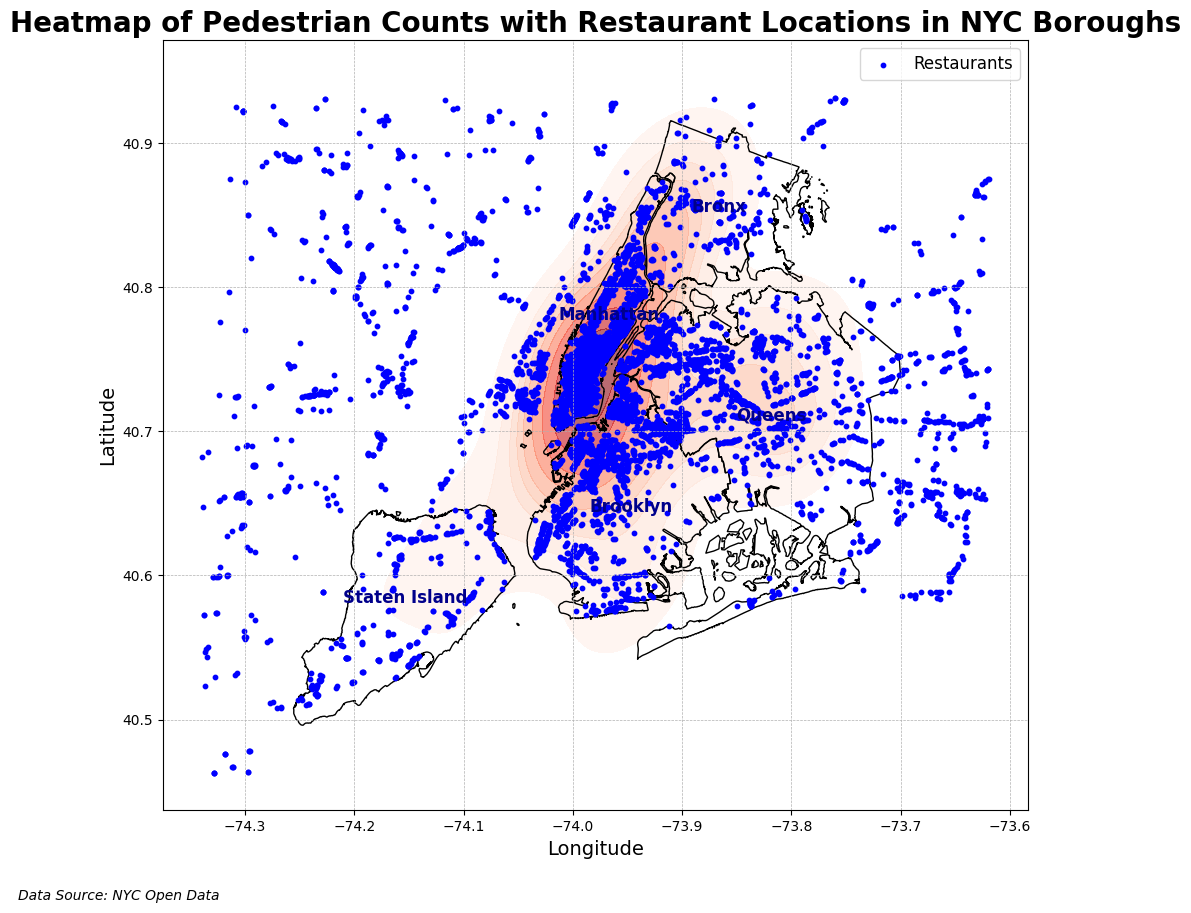

In [14]:
# Create a heatmap for pedestrian counts
plt.figure(figsize=(14, 10))
sns.kdeplot(
    x=ped_counts_gdf.geometry.x, y=ped_counts_gdf.geometry.y,
    fill=True, cmap='Reds', alpha=0.6
)

# Plot borough boundaries
boroughs_gdf.plot(ax=plt.gca(), edgecolor='black', linewidth=1, facecolor='none')

# Plot restaurants
restaurants_gdf.plot(ax=plt.gca(), color='blue', markersize=10, label='Restaurants')

# Adding annotations for each borough
for idx, row in boroughs_gdf.iterrows():
    plt.annotate(row['name'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=12, color='darkblue', weight='bold')

# Customize the plot
plt.title("Heatmap of Pedestrian Counts with Restaurant Locations in NYC Boroughs", fontsize=20, weight='bold')
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend and source annotation
plt.legend(fontsize=12)
plt.figtext(0.1, 0.02, 'Data Source: NYC Open Data', horizontalalignment='left', fontsize=10, style='italic')

# Show plot
plt.show()

# Breaking down into individual boroughs

In [15]:
def plot_borough(borough_name):
    borough = boroughs_gdf[boroughs_gdf['name'] == borough_name]
    borough_restaurants = restaurants_gdf[restaurants_gdf.within(borough.unary_union)]
    borough_ped_counts = ped_counts_gdf[ped_counts_gdf.within(borough.unary_union)]

    # Plot Data for the Borough
    fig, ax = plt.subplots(figsize=(12, 12))
    borough.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
    borough_restaurants.plot(ax=ax, color='blue', markersize=10, label='Restaurants', alpha=0.6)
    borough_ped_counts.plot(ax=ax, color='red', markersize=50, alpha=0.3, label='Pedestrian Counts')
    plt.title(f"Restaurants and Pedestrian Counts in {borough_name}", fontsize=16)
    plt.legend(fontsize=12)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.grid(True)
    plt.show()

    # Create a heatmap for pedestrian counts in the Borough
    plt.figure(figsize=(12, 12))
    sns.kdeplot(
        x=borough_ped_counts.geometry.x, y=borough_ped_counts.geometry.y,
        fill=True, cmap='Reds', alpha=0.5
    )
    borough.plot(ax=plt.gca(), edgecolor='black', linewidth=1, facecolor='none')
    borough_restaurants.plot(ax=plt.gca(), color='blue', markersize=10, label='Restaurants', alpha=0.6)
    plt.title(f"Heatmap of Pedestrian Counts with Restaurant Locations in {borough_name}", fontsize=16)
    plt.legend(fontsize=12)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.grid(True)
    plt.show()

    # Interactive Map with markers
    map_center = [borough.geometry.centroid.y.mean(), borough.geometry.centroid.x.mean()]
    folium_map = folium.Map(location=map_center, zoom_start=12)

    # Add restaurants to the map
    for _, row in borough_restaurants.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row['name'],
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(folium_map)

    # Add pedestrian counts heatmap
    heat_data = [[row.geometry.y, row.geometry.x] for index, row in borough_ped_counts.iterrows()]
    HeatMap(heat_data).add_to(folium_map)

    # Save and display the interactive map
    folium_map.save(f"{borough_name}_map.html")
    print(f"Interactive map for {borough_name} saved as {borough_name}_map.html")

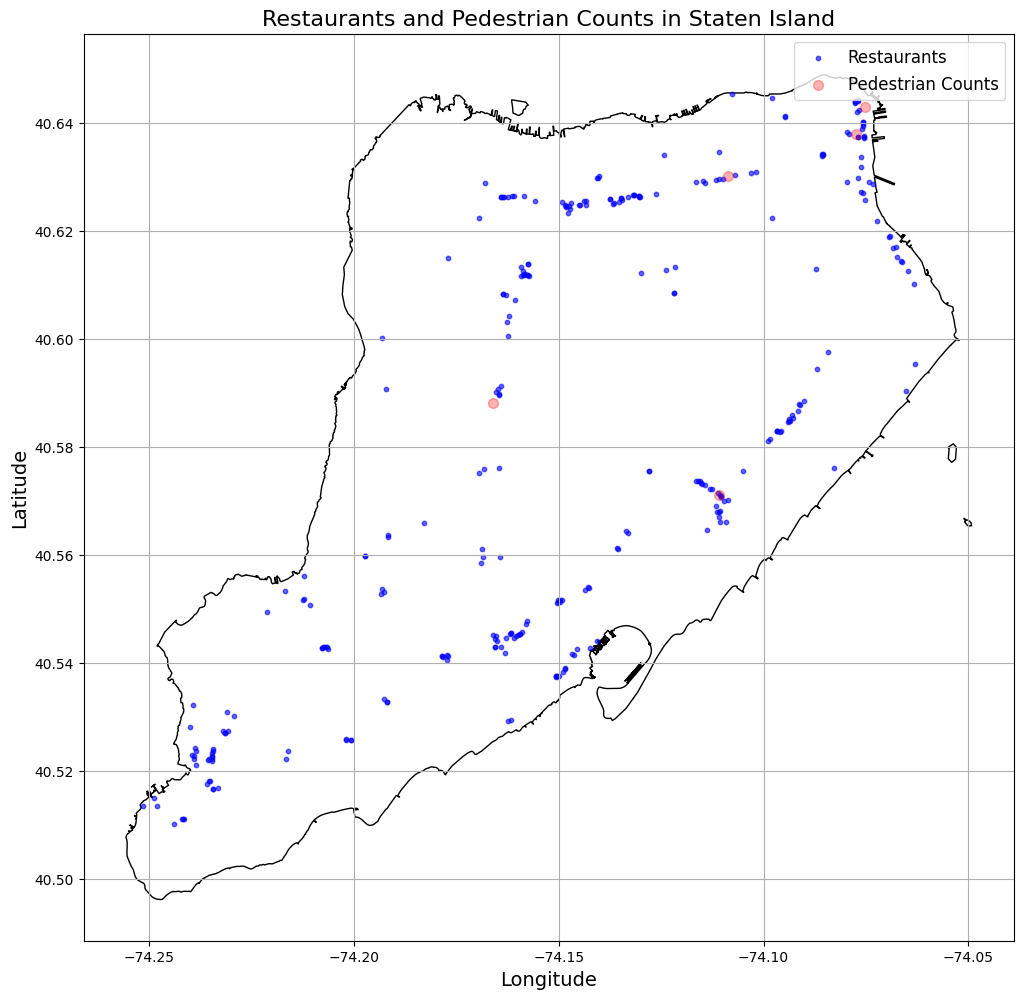

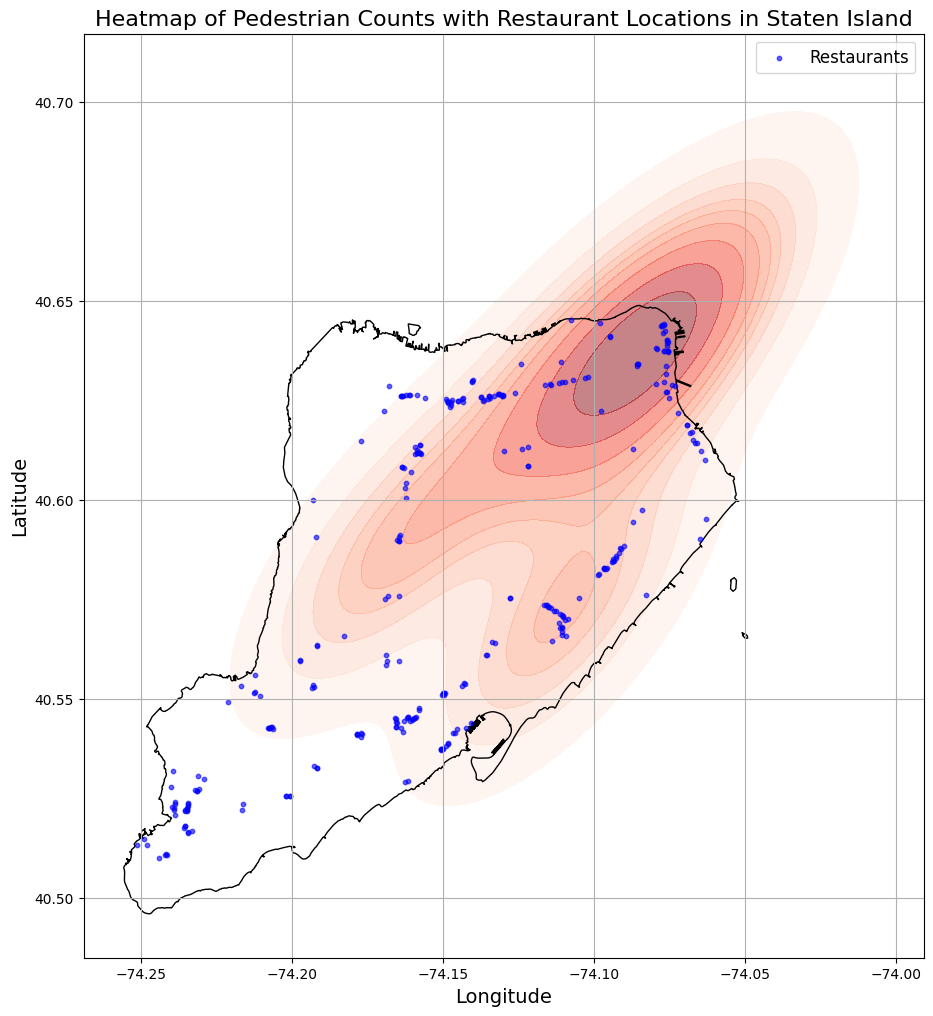

Interactive map for Staten Island saved as Staten Island_map.html


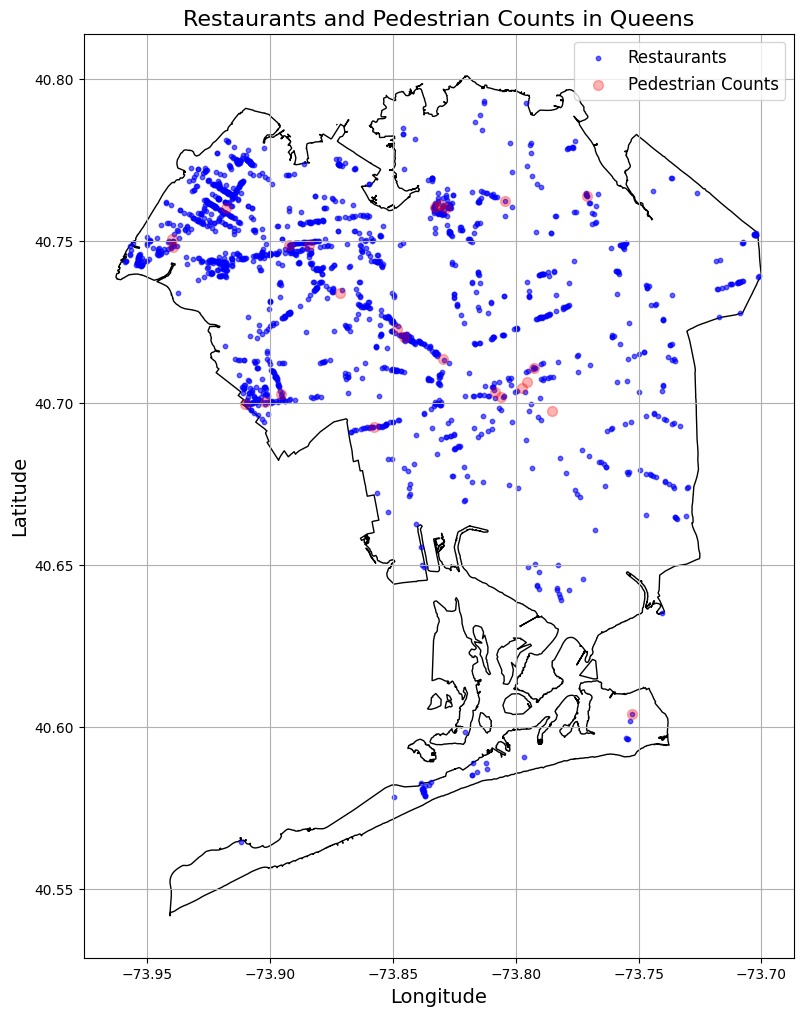

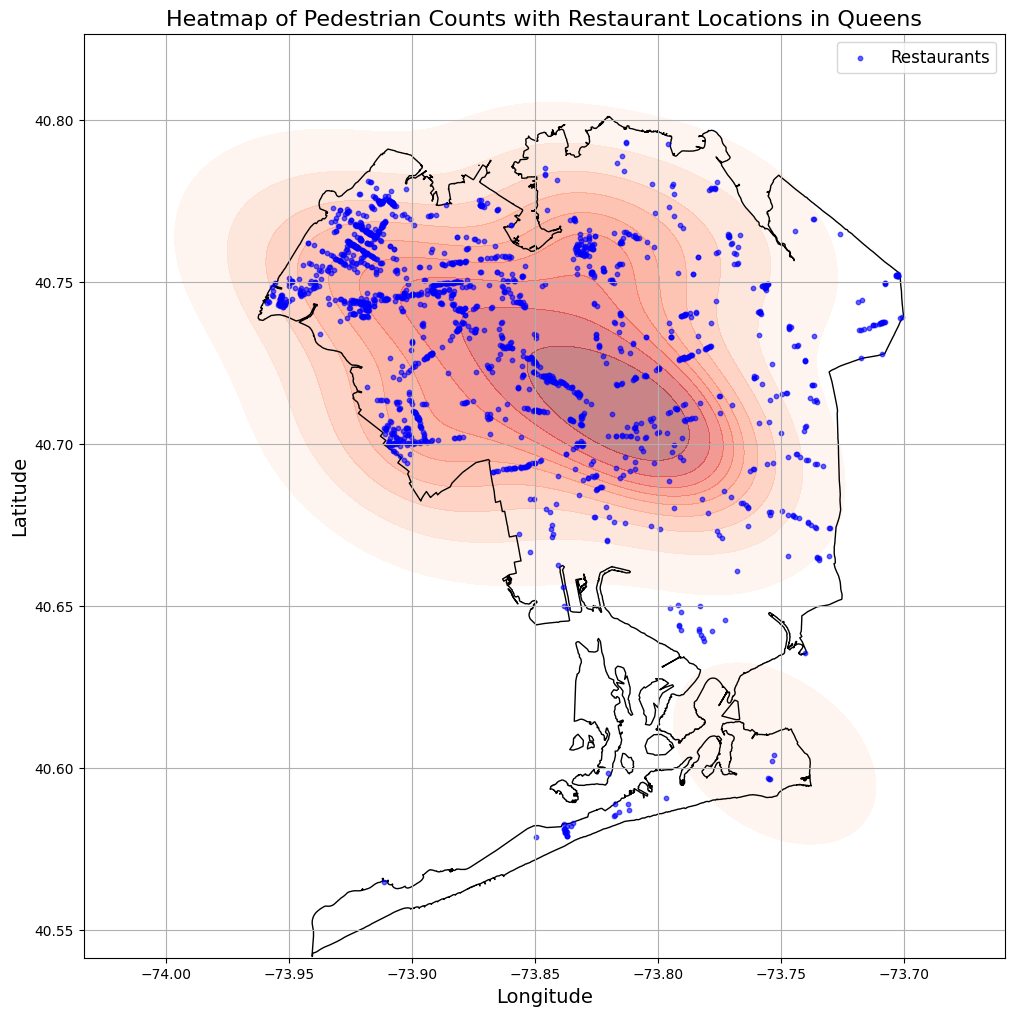

Interactive map for Queens saved as Queens_map.html


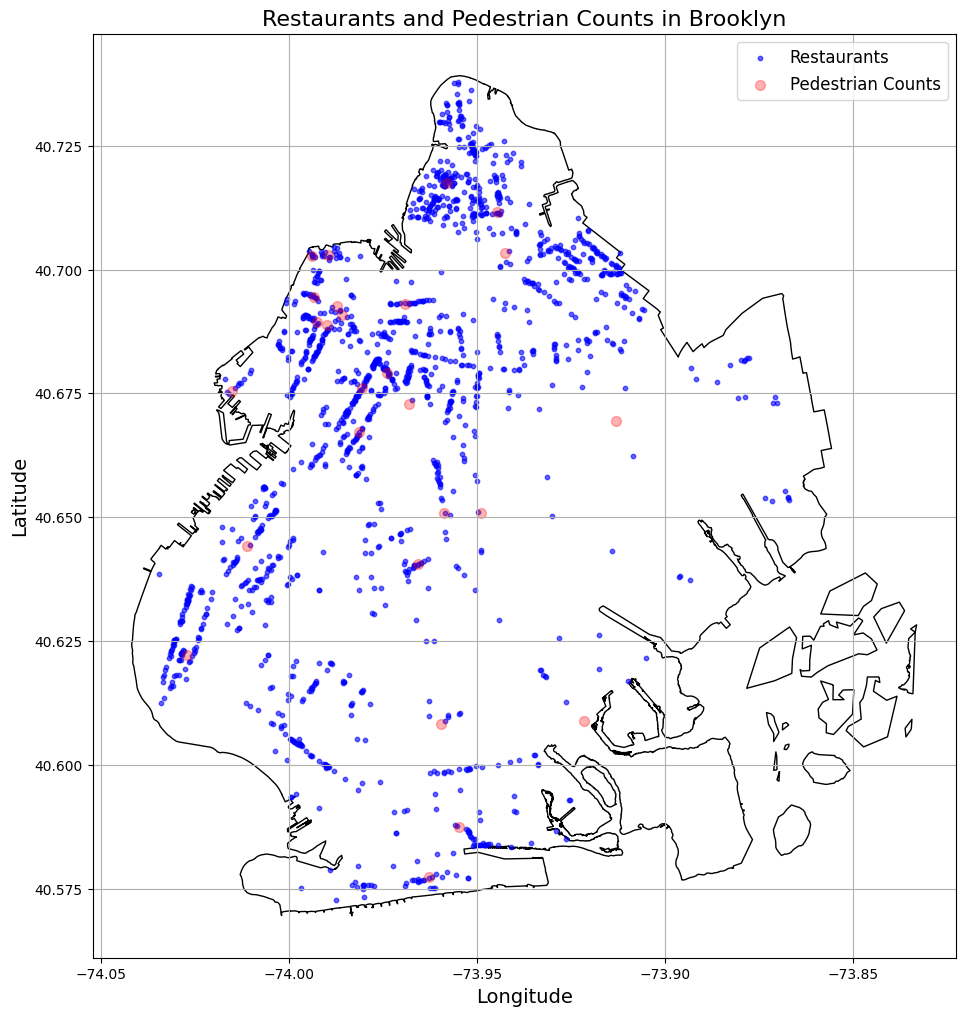

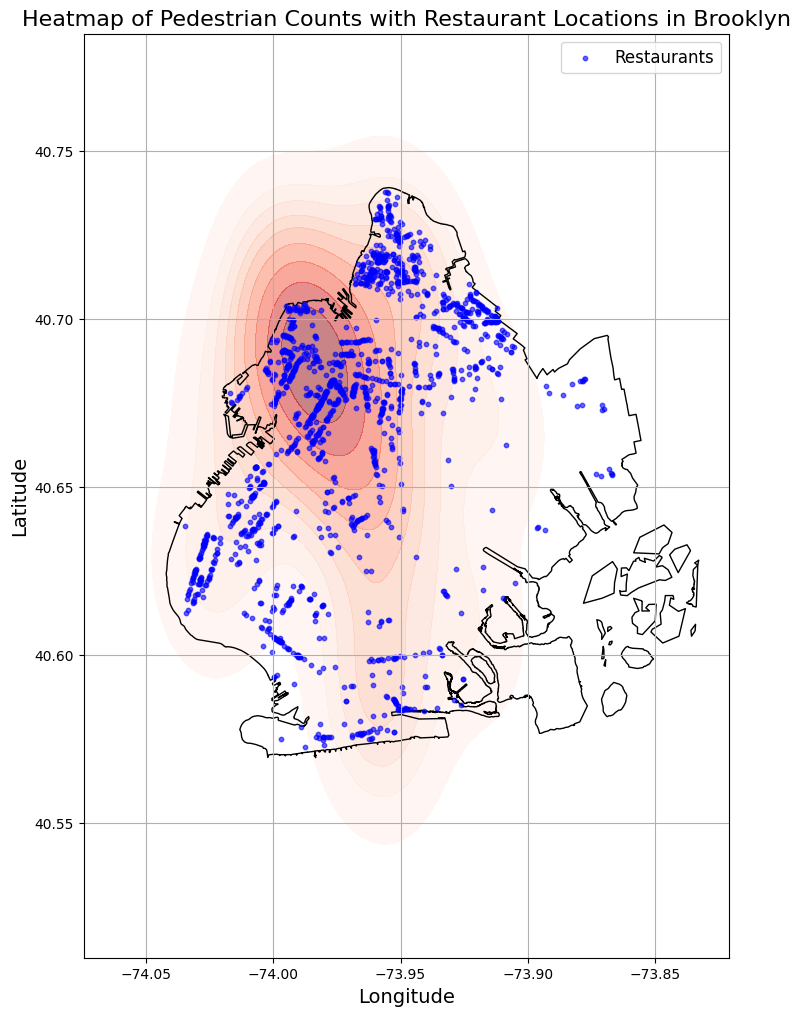

Interactive map for Brooklyn saved as Brooklyn_map.html


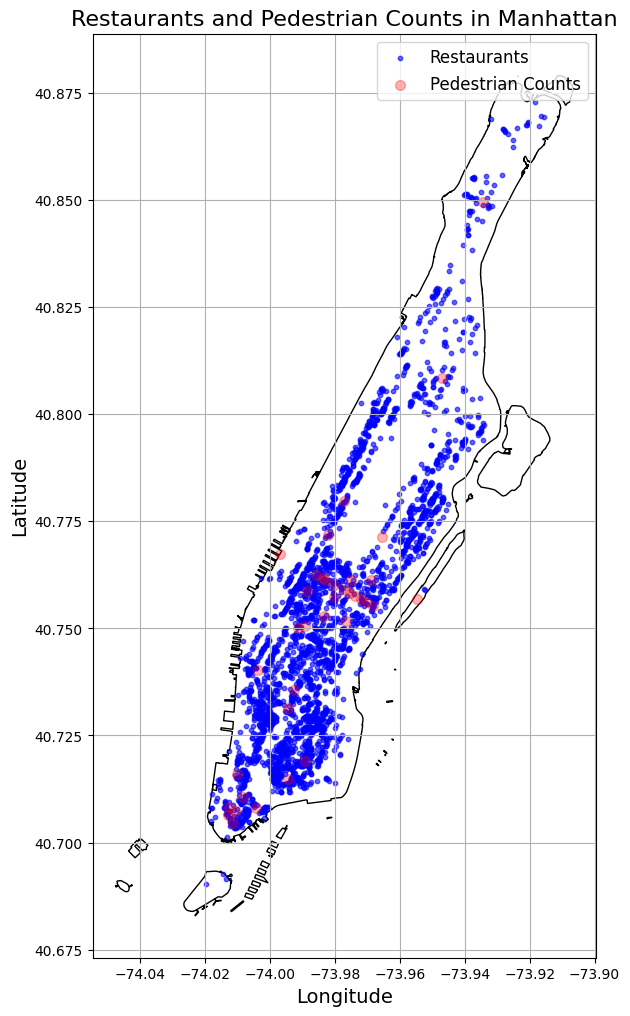

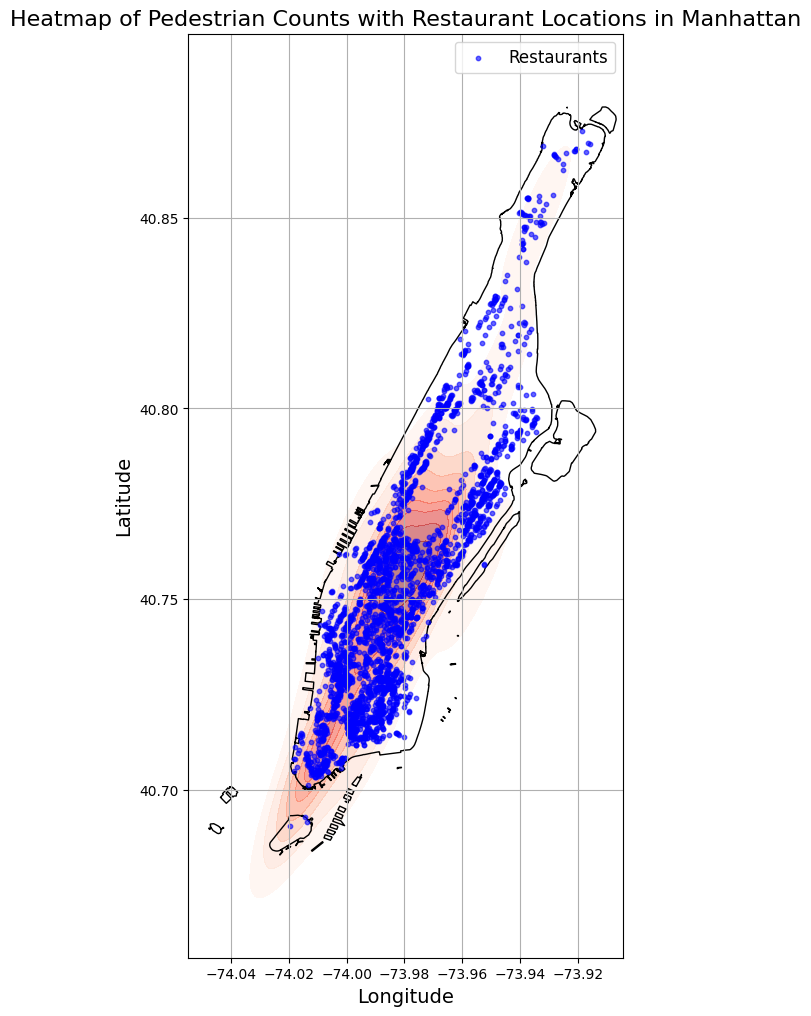

Interactive map for Manhattan saved as Manhattan_map.html


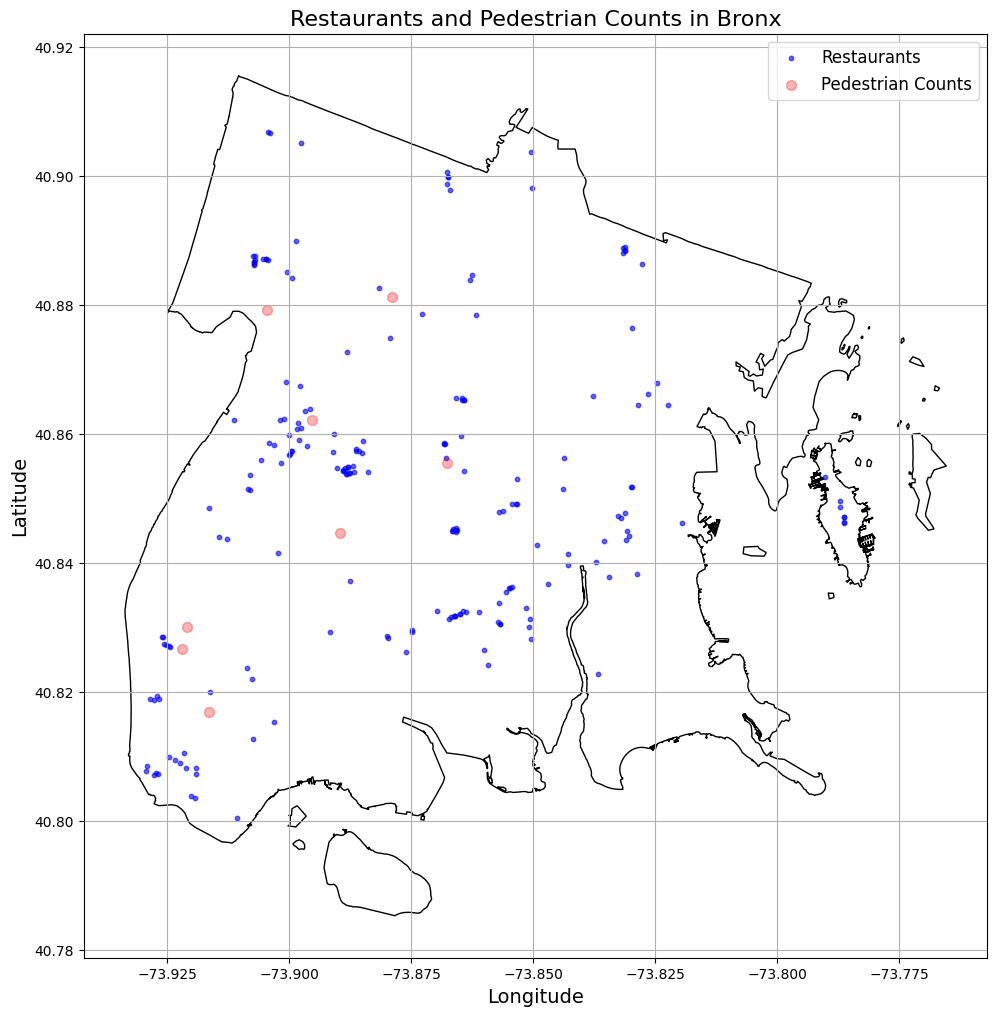

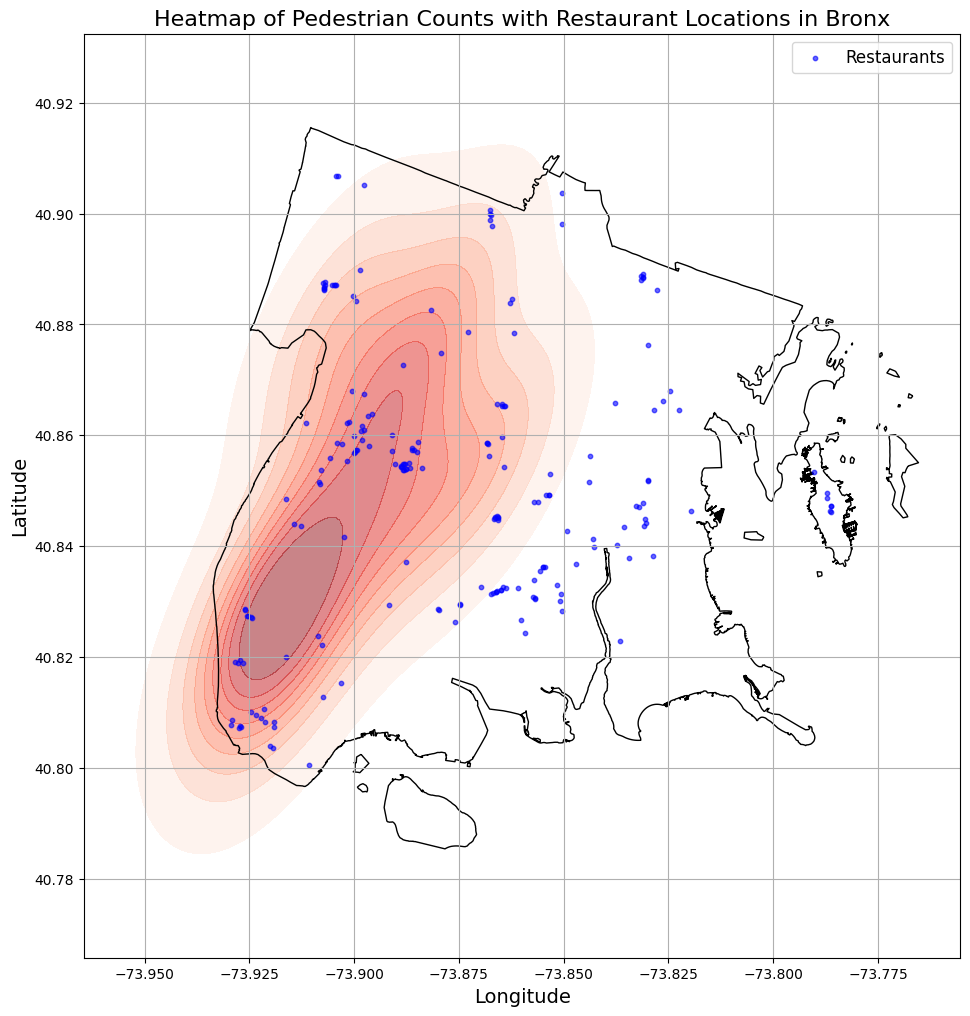

Interactive map for Bronx saved as Bronx_map.html


In [16]:
# Plot data for all boroughs
borough_names = boroughs_gdf['name'].unique()
for borough_name in borough_names:
    plot_borough(borough_name)

# Interactive Heatmaps using Folium

In [17]:
def plot_interactive_heatmaps(borough_name):
    borough = boroughs_gdf[boroughs_gdf['name'] == borough_name]
    borough_ped_counts = ped_counts_gdf[ped_counts_gdf.within(borough.unary_union)]

    map_center = [borough.geometry.centroid.y.mean(), borough.geometry.centroid.x.mean()]
    folium_map = folium.Map(location=map_center, zoom_start=12)

    # Add pedestrian counts heatmap only
    heat_data = [[row.geometry.y, row.geometry.x] for index, row in borough_ped_counts.iterrows()]
    HeatMap(heat_data).add_to(folium_map)

    # Save and display the interactive map
    folium_map.save(f"{borough_name}_heatmap.html")
    print(f"Interactive heatmap for {borough_name} saved as {borough_name}_heatmap.html")


In [18]:
# Interactive heatmaps for all boroughs
for borough_name in borough_names:
    plot_interactive_heatmaps(borough_name)

Interactive heatmap for Staten Island saved as Staten Island_heatmap.html
Interactive heatmap for Queens saved as Queens_heatmap.html
Interactive heatmap for Brooklyn saved as Brooklyn_heatmap.html
Interactive heatmap for Manhattan saved as Manhattan_heatmap.html
Interactive heatmap for Bronx saved as Bronx_heatmap.html


In [19]:
# time_columns = ['May07_AM', 'May07_PM', 'May07_MD', 'Sept07_AM', 'Sept07_PM', 'Sept07_MD', 
#                 'May08_AM', 'May08_PM', 'May08_MD', 'Sept08_AM', 'Sept08_PM', 'Sept08_MD', 
#                 'May09_AM', 'May09_PM', 'May09_MD', 'Sept09_AM', 'Sept09_PM', 'Sept09_MD', 
#                 'May10_AM', 'May10_PM', 'May10_MD', 'Sept10_AM', 'Sept10_PM', 'Sept10_MD', 
#                 'May11_AM', 'May11_PM', 'May11_MD', 'Sept11_AM', 'Sept11_PM', 'Sept11_MD', 
#                 'May12_AM', 'May12_PM', 'May12_MD', 'Sept12_AM', 'Sept12_PM', 'Sept12_MD', 
#                 'May13_AM', 'May13_PM', 'May13_MD', 'Sept13_AM', 'Sept13_PM', 'Sept13_MD', 
#                 'May14_AM', 'May14_PM', 'May14_MD', 'Sept14_AM', 'Sept14_PM', 'Sept14_MD', 
#                 'May15_AM', 'May15_PM', 'May15_MD', 'Sept15_AM', 'Sept15_PM', 'Sept15_MD', 
#                 'May16_AM', 'May16_PM', 'May16_MD', 'Sept16_AM', 'Sept16_PM', 'Sept16_MD', 
#                 'May17_AM', 'May17_PM', 'May17_MD', 'Sept17_AM', 'Sept17_PM', 'Sept17_MD', 
#                 'May18_AM', 'May18_PM', 'May18_MD', 'Sept18_AM', 'Sept18_PM', 'Sept18_MD', 
#                 'May19_AM', 'May19_PM', 'May19_MD', 'Oct20_AM', 'Oct20_PM', 'Oct20_MD', 
#                 'May21_AM', 'May21_PM', 'May21_MD', 'Oct21_AM', 'Oct21_PM', 'Oct21_MD', 
#                 'May22_AM', 'May22_MD', 'Oct22_AM', 'Oct22_PM', 'Oct22_MD', 
#                 'May23_AM', 'May23_MD', 'Oct23_AM', 'Oct23_PM', 'Oct23_MD', 
#                 'June24_AM', 'June24_PM', 'June24_MD']


# Pedestrian Count Gif

In [20]:
# Aggregate data by year
ped_counts_gdf['year'] = ped_counts_df.filter(regex='(AM|PM|MD)$').columns.str.extract(r'(\d{2})')[0]
ped_counts_agg = ped_counts_gdf.groupby(['geometry', 'year']).sum().reset_index()

In [21]:
# Prepare data for animation
ped_counts_agg_gdf = gpd.GeoDataFrame(
    ped_counts_agg,
    geometry=ped_counts_agg['geometry'],
    crs="EPSG:4326"
)

In [22]:
# List of unique years for animation frames
years = ped_counts_agg_gdf['year'].unique()

In [23]:
# Order the years
years = sorted(years, key=lambda x: int(x))

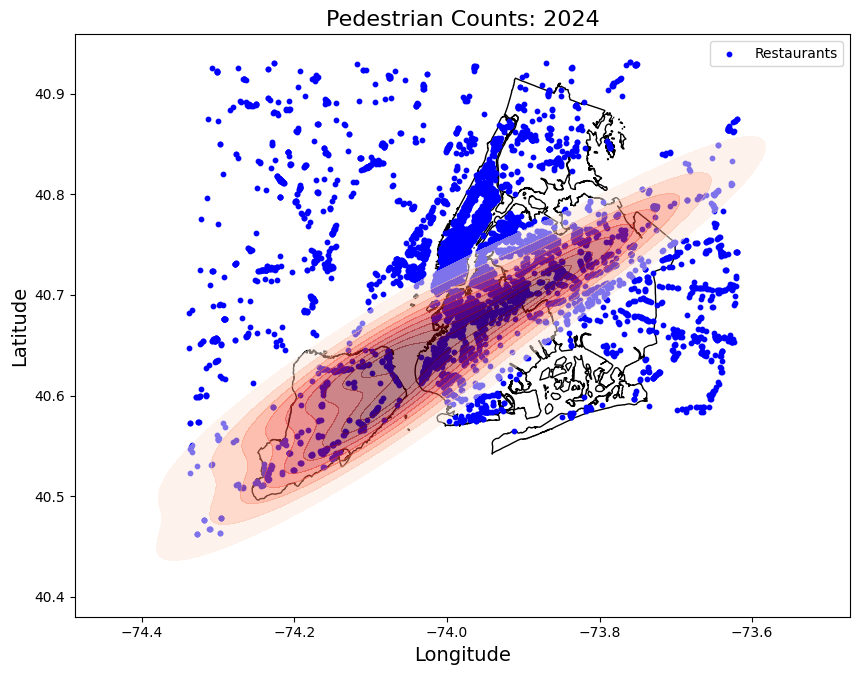

In [24]:
# Set up figure for animation
fig, ax = plt.subplots(figsize=(10, 10))

# Initialize the plot with static elements (boroughs and restaurants)
def init():
    boroughs_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
    restaurants_gdf.plot(ax=ax, color='blue', markersize=10, label='Restaurants')
    ax.set_title("Pedestrian Counts Over Time", fontsize=16)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    ax.legend()

# Animation function
def update(frame):
    ax.clear()
    boroughs_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none')
    restaurants_gdf.plot(ax=ax, color='blue', markersize=10, label='Restaurants')
    current_year = years[frame]
    current_data = ped_counts_agg_gdf[ped_counts_agg_gdf['year'] == current_year]
    sns.kdeplot(x=current_data.geometry.x, y=current_data.geometry.y, ax=ax, fill=True, cmap='Reds', alpha=0.5)
    ax.set_title(f"Pedestrian Counts: 20{current_year}", fontsize=16)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    ax.legend()
    # # Add annotations for better understanding
    # for i, row in current_data.iterrows():
    #     ax.annotate(f"{row['count']}", (row.geometry.x, row.geometry.y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')


ani = animation.FuncAnimation(fig, update, frames=len(years), init_func=init, repeat=True)

# Save or display the animation using Pillow
ani.save('pedestrian_counts_animation_final.gif', writer='pillow')
plt.show()

# Choropleth map

In [25]:
# Add restaurant count per borough to the GeoDataFrame
boroughs_gdf['restaurant_count'] = boroughs_gdf['name'].apply(
    lambda x: restaurants_gdf[restaurants_gdf.within(boroughs_gdf[boroughs_gdf['name'] == x].geometry.unary_union)].shape[0]
)

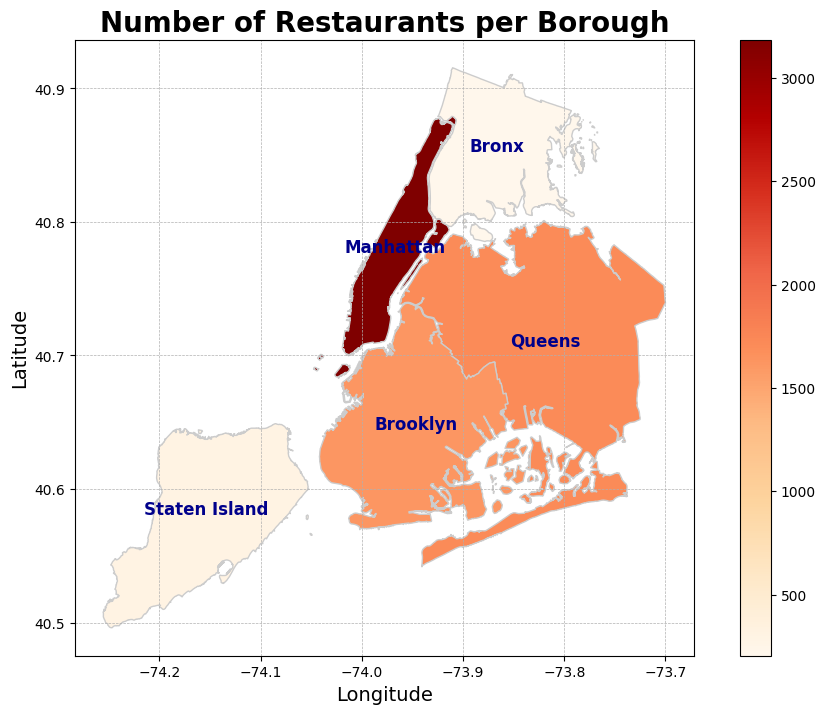

In [26]:
# Plot the choropleth map with enhancements
fig, ax = plt.subplots(figsize=(12, 8))
boroughs_gdf.plot(column='restaurant_count', cmap='OrRd', linewidth=1, ax=ax, edgecolor='0.8', legend=True)

# Adding annotations for each borough
for idx, row in boroughs_gdf.iterrows():
    plt.annotate(row['name'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=12, color='darkblue', weight='bold')

# Customize the plot
plt.title('Number of Restaurants per Borough', fontsize=20, weight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Creating ClusterMaps

In [27]:
def plot_interactive_heatmaps(borough_name):
    borough = boroughs_gdf[boroughs_gdf['name'] == borough_name]
    borough_restaurants = restaurants_gdf[restaurants_gdf.within(borough.unary_union)]
    borough_ped_counts = ped_counts_gdf[ped_counts_gdf.within(borough.unary_union)]

    map_center = [borough.geometry.centroid.y.mean(), borough.geometry.centroid.x.mean()]
    folium_map = folium.Map(location=map_center, zoom_start=12)

    # Add clustered restaurants to the map
    marker_cluster = MarkerCluster().add_to(folium_map)
    for _, row in borough_restaurants.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row['name'],
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

    # Add pedestrian counts heatmap
    heat_data = [[row.geometry.y, row.geometry.x] for index, row in borough_ped_counts.iterrows()]
    HeatMap(heat_data).add_to(folium_map)

    # Save and display the interactive map
    folium_map.save(f"{borough_name}clustermap.html")
    print(f"Interactive heatmap for {borough_name} saved as {borough_name}_heatmap.html")


In [28]:
for borough_name in borough_names:
    plot_interactive_heatmaps(borough_name)

Interactive heatmap for Staten Island saved as Staten Island_heatmap.html
Interactive heatmap for Queens saved as Queens_heatmap.html
Interactive heatmap for Brooklyn saved as Brooklyn_heatmap.html
Interactive heatmap for Manhattan saved as Manhattan_heatmap.html
Interactive heatmap for Bronx saved as Bronx_heatmap.html
